Building heart disease prediction
STEP 1: EXPLORATORY DATA ANALYSIS 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [3]:
#load the dataset
ds=pd.read_csv('heart.csv')
print(ds.shape)#row and column

(303, 14)


In [4]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


finding missing values

In [8]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

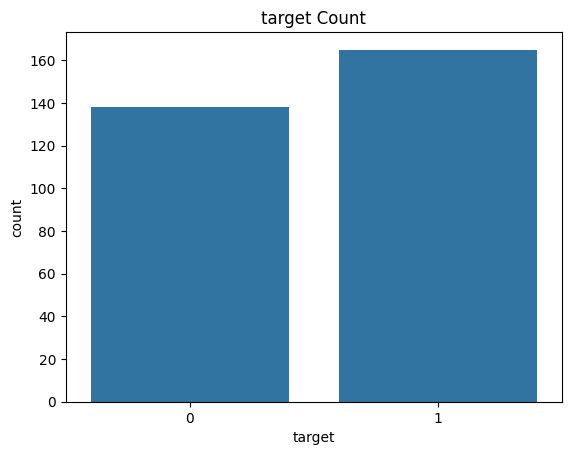

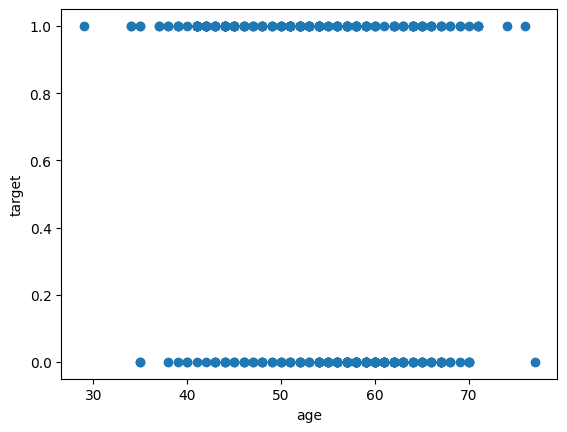

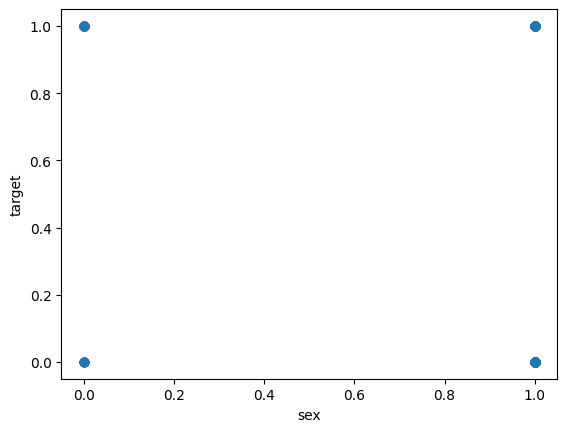

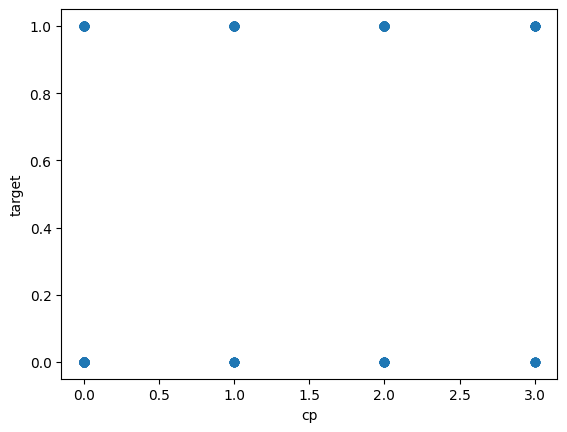

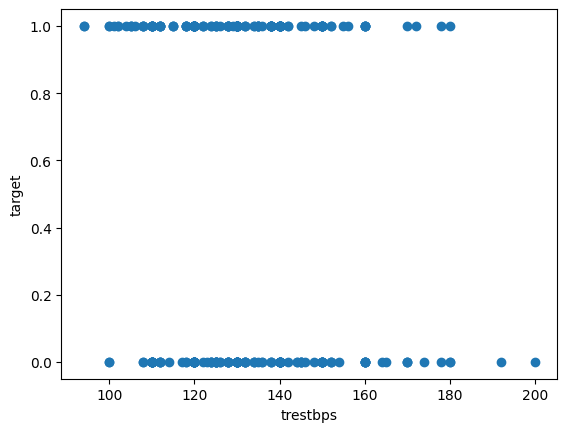

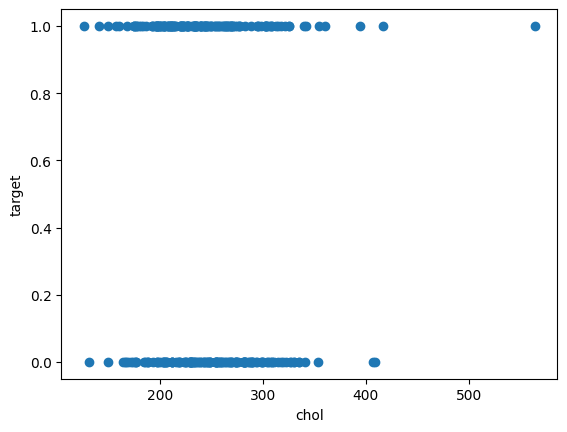

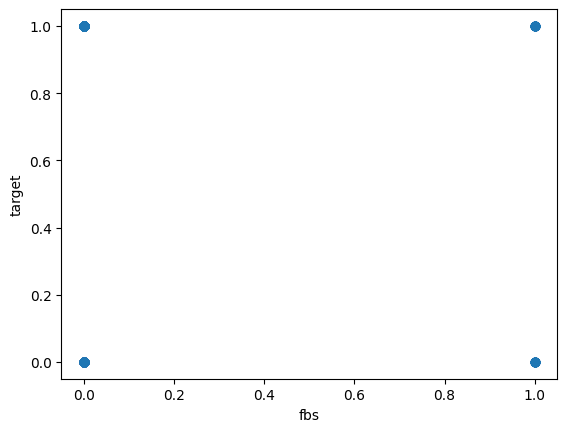

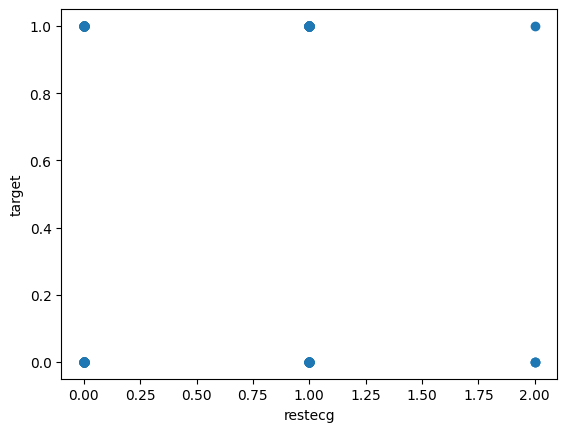

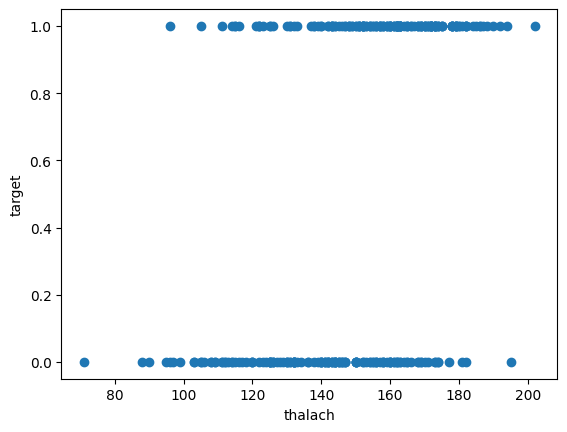

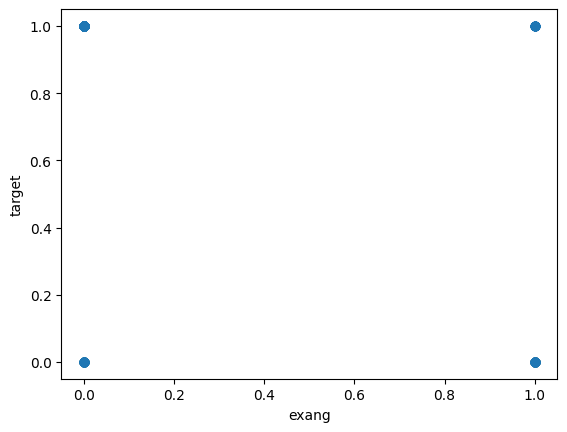

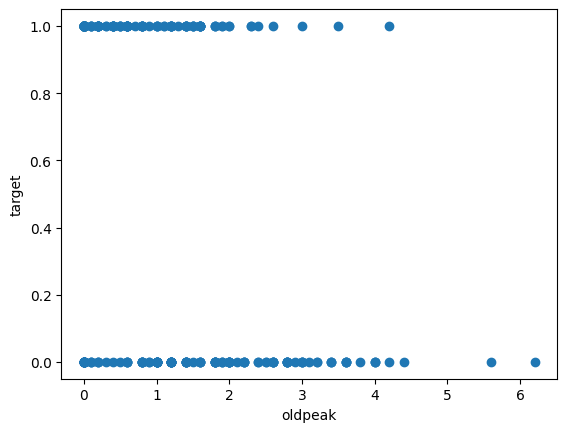

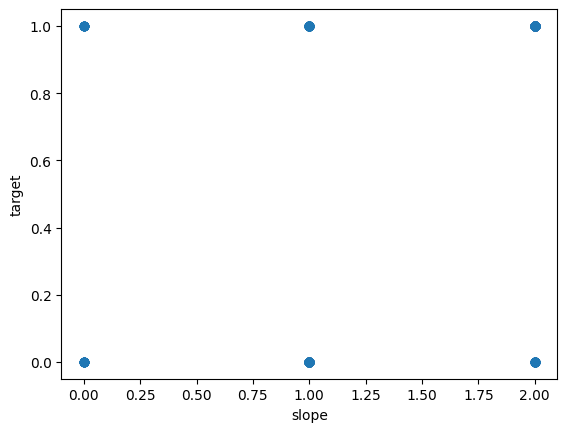

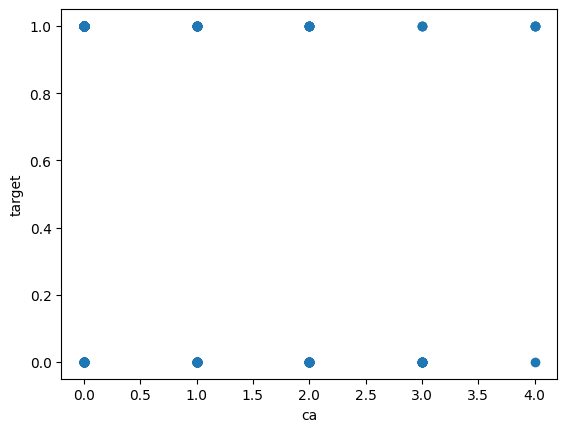

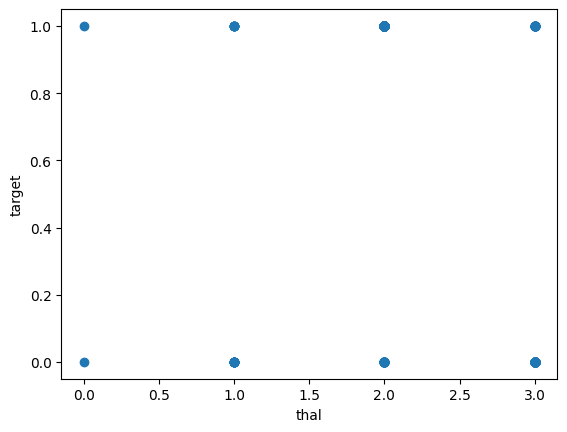

In [9]:
#visualizing target count
sns.countplot(x='target', data=ds)
plt.title('target Count')
plt.show()

#visualizing target based on age
plt.scatter(x='age',y='target',data=ds)
plt.xlabel('age')
plt.ylabel('target')
plt.show()

#visualizing target based on sex
plt.scatter(x='sex',y='target',data=ds)
plt.xlabel('sex')
plt.ylabel('target')
plt.show()

#visualizing target based on cp
plt.scatter(x='cp',y='target',data=ds)
plt.xlabel('cp')
plt.ylabel('target')
plt.show()

#visualizing target based on trestbps
plt.scatter(x='trestbps',y='target',data=ds)
plt.xlabel('trestbps')
plt.ylabel('target')
plt.show()

#visualizing target based on chol
plt.scatter(x='chol',y='target',data=ds)
plt.xlabel('chol')
plt.ylabel('target')
plt.show()

#visualizing target based on fbs
plt.scatter(x='fbs',y='target',data=ds)
plt.xlabel('fbs')
plt.ylabel('target')
plt.show()

#visualizing target based on restecg
plt.scatter(x='restecg',y='target',data=ds)
plt.xlabel('restecg')
plt.ylabel('target')
plt.show()

#visualizing target based on thalach
plt.scatter(x='thalach',y='target',data=ds)
plt.xlabel('thalach')
plt.ylabel('target')
plt.show()

#visualizing target based on exang
plt.scatter(x='exang',y='target',data=ds)
plt.xlabel('exang')
plt.ylabel('target')
plt.show()

#visualizing target based on oldpeak
plt.scatter(x='oldpeak',y='target',data=ds)
plt.xlabel('oldpeak')
plt.ylabel('target')
plt.show()

#visualizing target based on slopw
plt.scatter(x='slope',y='target',data=ds)
plt.xlabel('slope')
plt.ylabel('target')
plt.show()

#visualizing target based on ca
plt.scatter(x='ca',y='target',data=ds)
plt.xlabel('ca')
plt.ylabel('target')
plt.show()

#visualizing target based on thal
plt.scatter(x='thal',y='target',data=ds)
plt.xlabel('thal')
plt.ylabel('target')
plt.show()

STEP 2: FEATURE SELECTION

In [39]:
X = ds.drop('target', axis=1)
y = ds['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


STEP 3: BUILDING 5 MODEL AND SELECTING BEST MODEL 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Model Evaluation
# Calculate Accuracies
logistic_acc = accuracy_score(y_test, y_pred_logistic)
tree_acc = accuracy_score(y_test, y_pred_tree)
forest_acc = accuracy_score(y_test, y_pred_forest)
knn_acc = accuracy_score(y_test, y_pred_knn)
ada_acc = accuracy_score(y_test, y_pred_ada)

# Print Accuracies
print("\nModel Accuracies:")
print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print(f"Random Forest Accuracy: {forest_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")
print(f"AdaBoost Accuracy: {ada_acc:.4f}")

# 8. Best Model Selection
accuracies = {
    'Logistic Regression': logistic_acc,
    'Decision Tree': tree_acc,
    'Random Forest': forest_acc,
    'KNN': knn_acc,
    'AdaBoost': ada_acc
}

best_model_name = max(accuracies, key=accuracies.get)
print("\nBest Model is:", best_model_name, "with Accuracy:", accuracies[best_model_name])

# If you want the actual model object:
if best_model_name == 'Logistic Regression':
    final_model = logistic_model
elif best_model_name == 'Decision Tree':
    final_model = tree_model
elif best_model_name == 'Random Forest':
    final_model = forest_model
elif best_model_name == 'KNN':
    final_model = knn_model
elif best_model_name == 'AdaBoost':
    final_model = ada_model
    
# Final evaluation of best model
final_predictions = final_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions))



Model Accuracies:
Logistic Regression Accuracy: 0.8525
Decision Tree Accuracy: 0.8197
Random Forest Accuracy: 0.8525
KNN Accuracy: 0.9180
AdaBoost Accuracy: 0.8197

Best Model is: KNN with Accuracy: 0.9180327868852459

Confusion Matrix:
[[27  2]
 [ 3 29]]


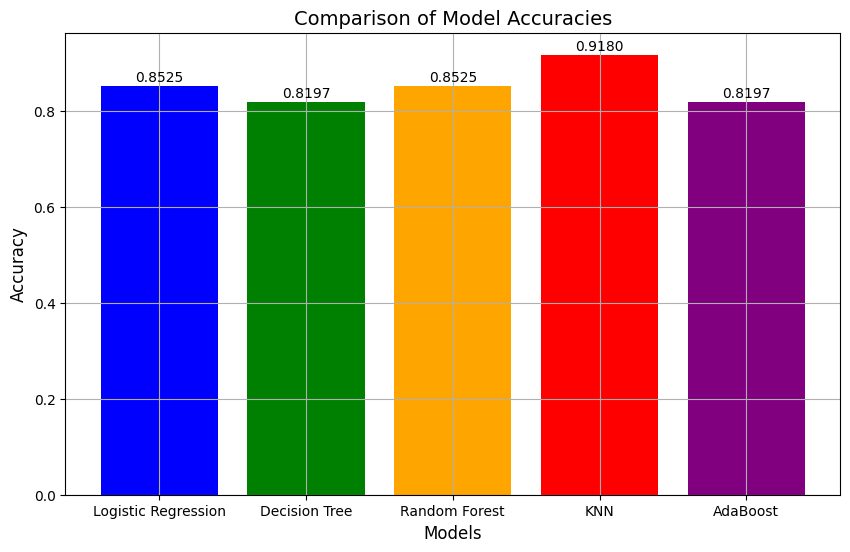

In [46]:
import matplotlib.pyplot as plt
import numpy as np
# 9. Visualizing Model Performance 
# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'AdaBoost']

# Accuracies of each model
accuracies = [logistic_acc, tree_acc, forest_acc, knn_acc, ada_acc]

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add titles and labels
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Show the plot
plt.grid(True)
plt.show()

STEP 4: SAVE THE MODEL IN PICKLE FILE 

In [48]:
import pickle
with open('bestmodelforheartdisease1.pkl','wb') as file:
    pickle.dump(knn_model,file)

In [49]:
feature_columns=ds.drop('target',axis=1).columns.tolist()
with open("heart_feature_columns.pkl","wb") as f:
    pickle.dump(feature_columns,f)

In [45]:
feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']